# Decision Tree with Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
#import dataset
dataset = pd.read_csv('D7data1.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
#Features
X = dataset.iloc[:,:-1].values

#Class label
y = dataset.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
#Model Building
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor(max_depth=3,random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [13]:
#Prediction
y_pred = classifier.predict(X_test)

In [15]:
from sklearn import tree
text = tree.export_text(classifier)
print(text)

|--- feature_12 <= -0.63
|   |--- feature_5 <= 1.64
|   |   |--- feature_5 <= 0.55
|   |   |   |--- value: [24.81]
|   |   |--- feature_5 >  0.55
|   |   |   |--- value: [32.49]
|   |--- feature_5 >  1.64
|   |   |--- feature_10 <= -0.07
|   |   |   |--- value: [46.42]
|   |   |--- feature_10 >  -0.07
|   |   |   |--- value: [28.55]
|--- feature_12 >  -0.63
|   |--- feature_12 <= 0.31
|   |   |--- feature_5 <= 0.44
|   |   |   |--- value: [20.97]
|   |   |--- feature_5 >  0.44
|   |   |   |--- value: [26.52]
|   |--- feature_12 >  0.31
|   |   |--- feature_0 <= 0.29
|   |   |   |--- value: [16.86]
|   |   |--- feature_0 >  0.29
|   |   |   |--- value: [11.86]



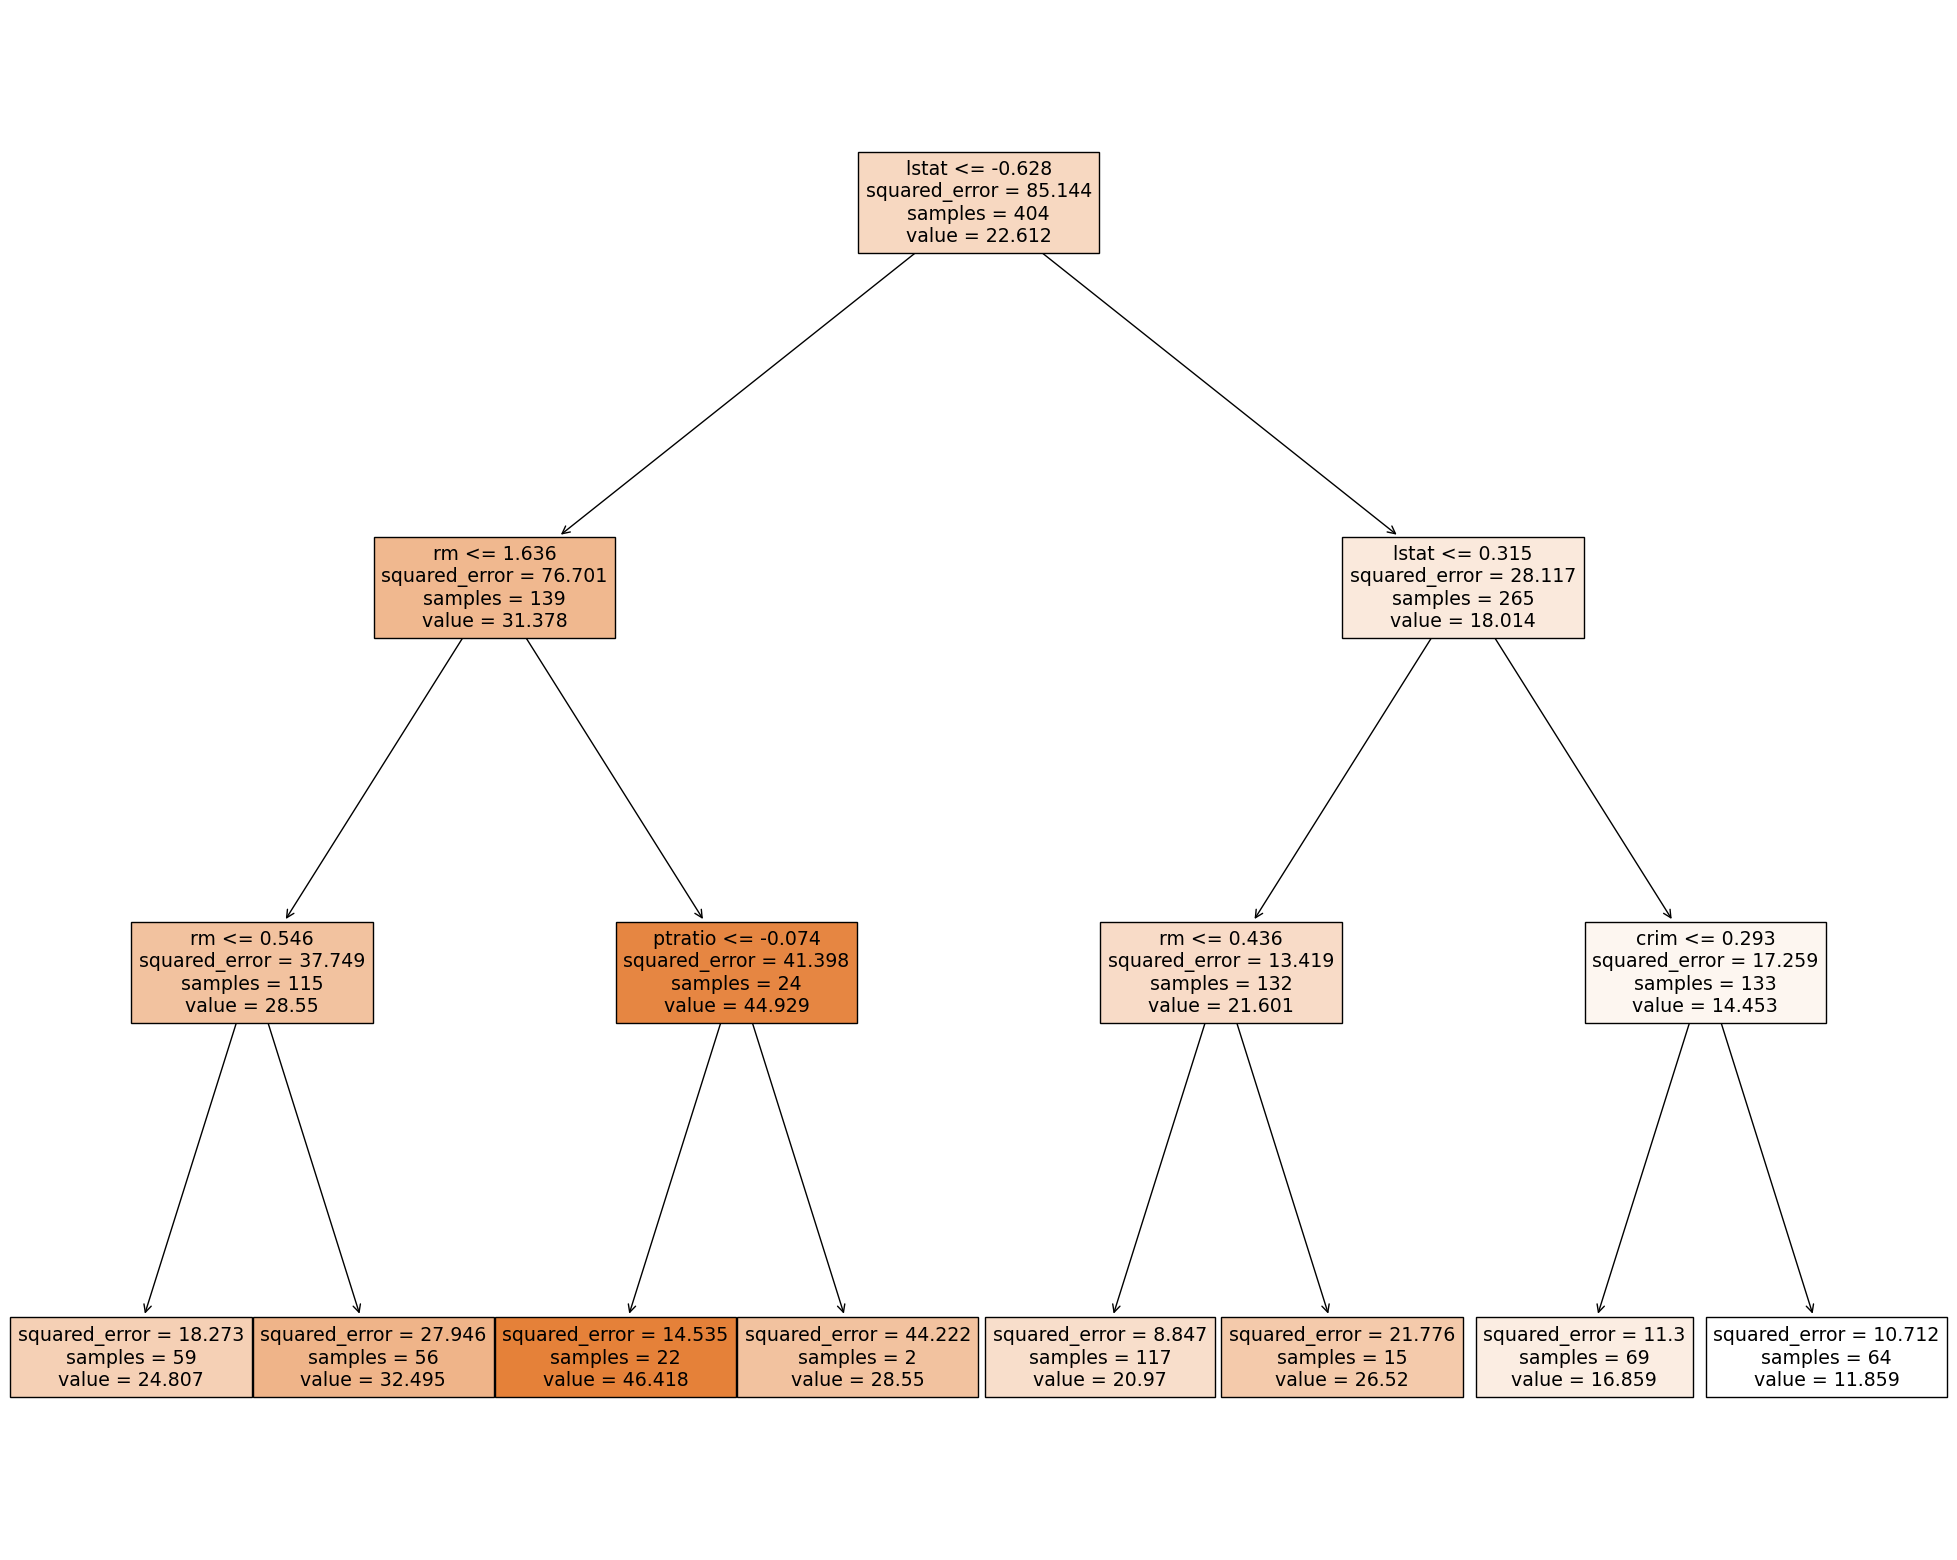

In [17]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=dataset.columns,
                   filled=True)